# 3.4 주성분 분석(PCA)

principal component analysis, PCA

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

from matplotlib import rc
rc('font', family='AppleGothic') 			## 애플 폰트 추가로
plt.rcParams['axes.unicode_minus'] = False  ## 한글 깨짐 방지

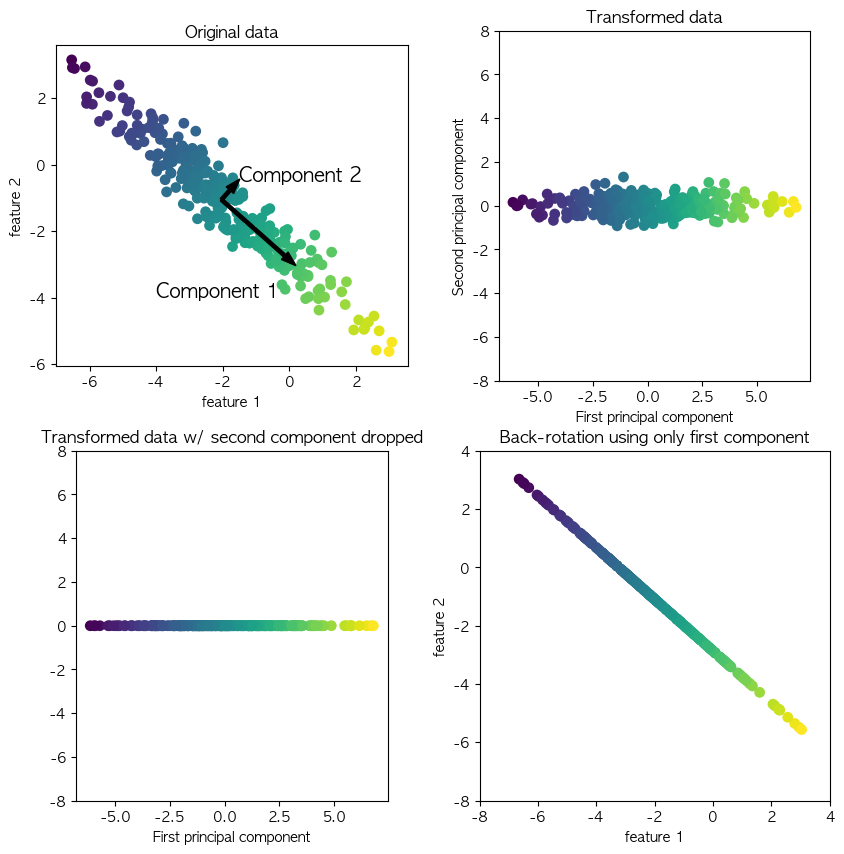

In [2]:
mglearn.plots.plot_pca_illustration()

In [5]:
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

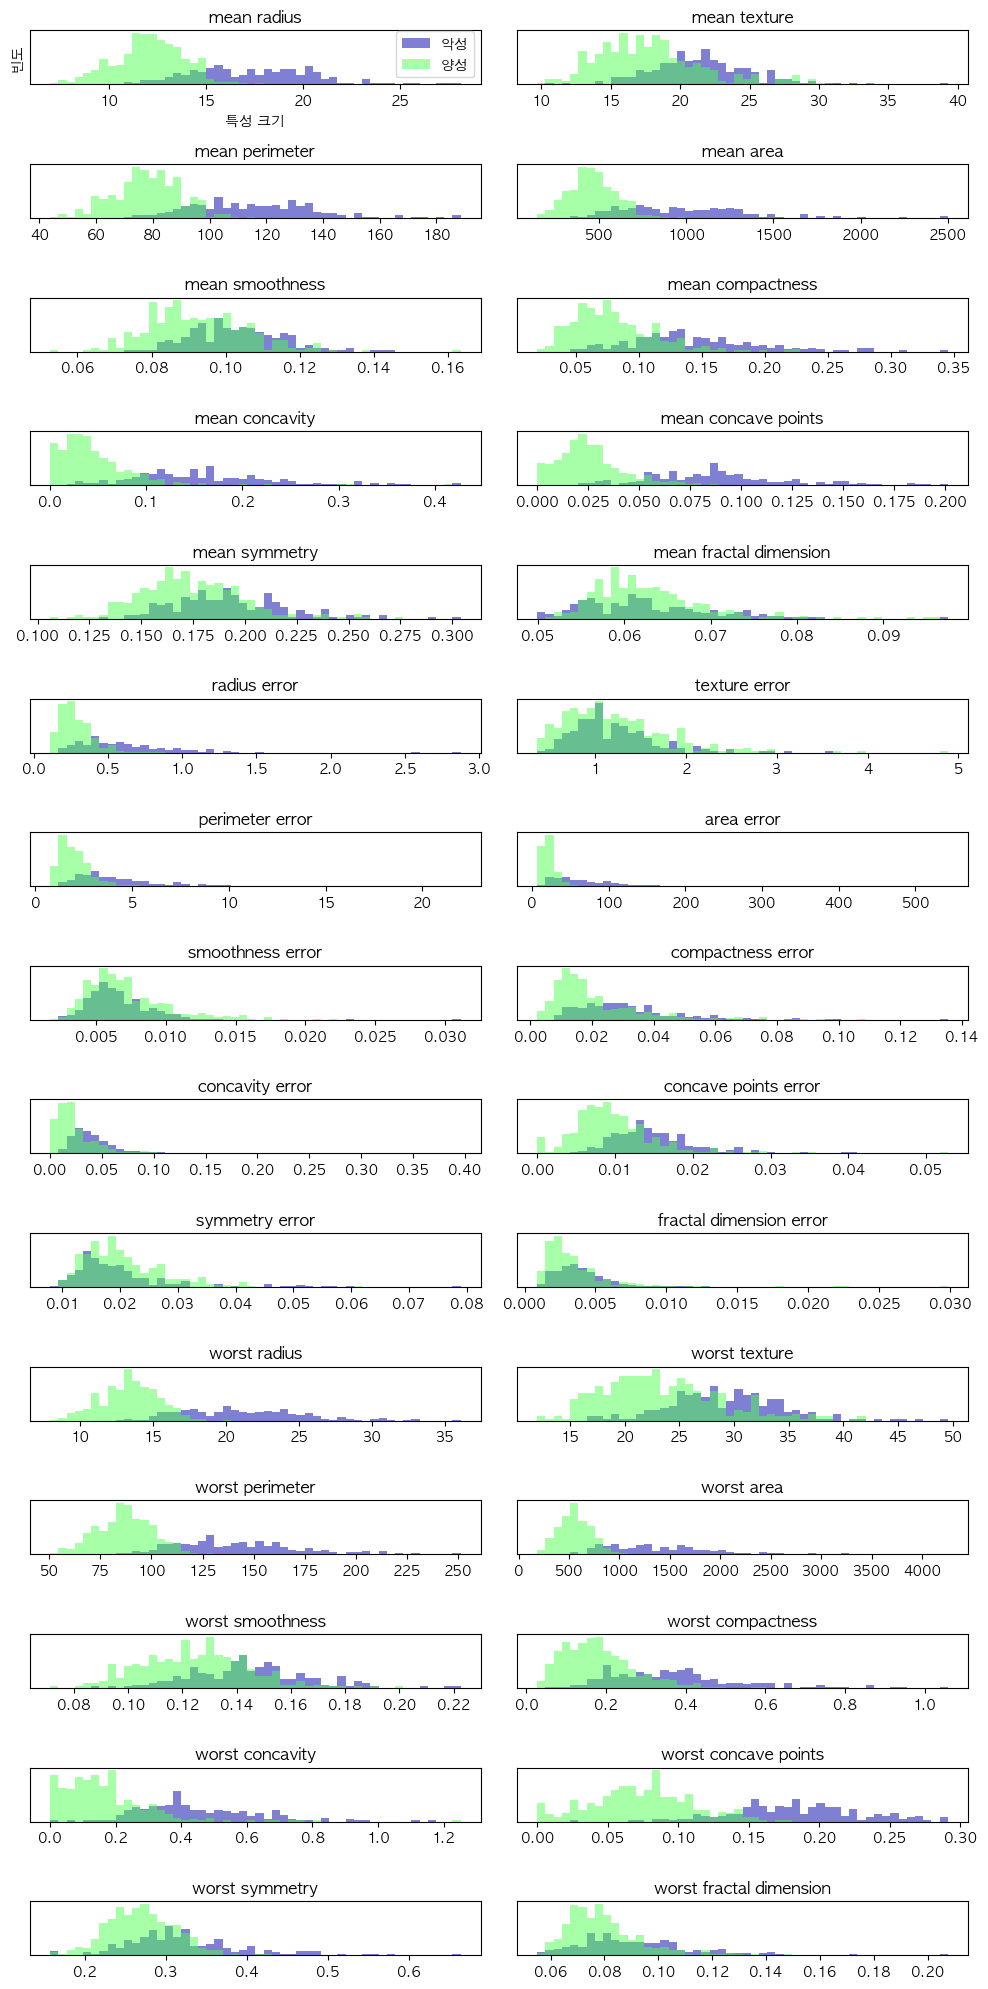

In [4]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc="best")
fig.tight_layout()

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [8]:
from sklearn.decomposition import PCA
# 데이터의 처음 두 개 주성분만 유지시킵니다.
pca = PCA(n_components=2)
# 유방암 데이터로 PCA 모델을 만듭니다.
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환합니다.
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태:", str(X_scaled.shape))
print("축소된 데이터의 형태:", str(X_pca.shape))

원본 데이터 형태: (569, 30)
축소된 데이터의 형태: (569, 2)


Text(0, 0.5, '두 번째 주성분')

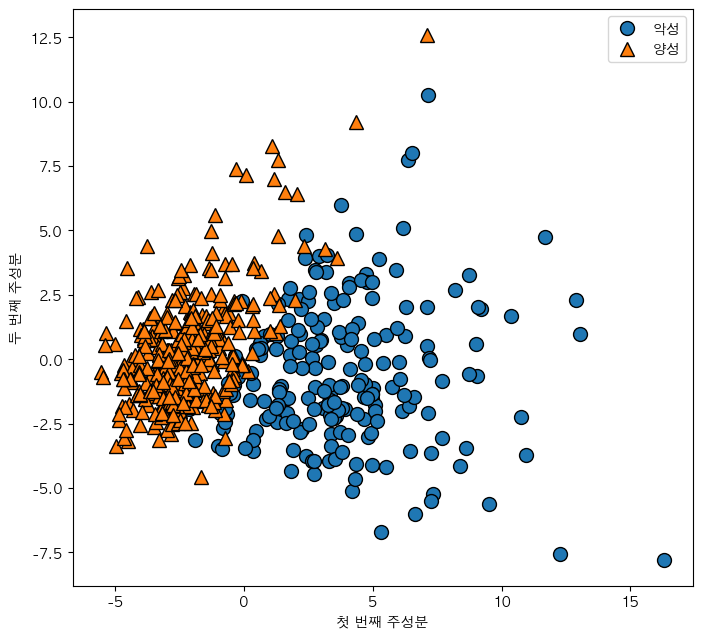

In [9]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타냅니다.
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["악성", "양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

In [10]:
print("PCA 주성분 형태:", pca.components_.shape)

PCA 주성분 형태: (2, 30)


In [11]:
print("PCA 주성분 형태:", pca.components_)

PCA 주성분 형태: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, '주성분')

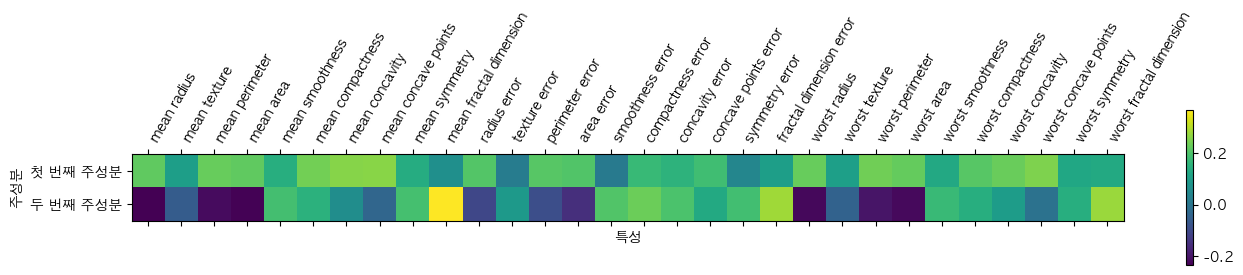

In [14]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

In [16]:
### 개인 테스트 코드 : PCA된 cancer 데이터셋 훈련 해보기
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

pca = PCA(n_components=2)
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환합니다.
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태:", str(X_scaled.shape))
print("축소된 데이터의 형태:", str(X_pca.shape))

X_train, X_test, y_train, y_test = train_test_split(X_pca, cancer.target,
                                                    random_state=0)

svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
print("테스트 세트 정확도: {:2f}".format(svm.score(X_test, y_test)))

원본 데이터 형태: (569, 30)
축소된 데이터의 형태: (569, 2)
테스트 세트 정확도: 0.930070


In [17]:
### 개인 테스트 코드 : 만약 그냥 훈련을 진행했다면?
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

cancer = load_breast_cancer()


X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
print("테스트 세트 정확도: {:2f}".format(svm.score(X_test, y_test)))

테스트 세트 정확도: 0.629371


In [18]:
### 개인 테스트 코드 : 똑같이 PCA 없이 그냥 훈련하는데 랜덤 포레스트로 모델 변경
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

cancer = load_breast_cancer()


X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("테스트 세트 정확도: {:2f}".format(rf.score(X_test, y_test)))

테스트 세트 정확도: 0.965035


In [19]:
### 개인 테스트 코드 : PCA 전처리 후 랜덤 포레스트로 모델
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

pca = PCA(n_components=2)
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환합니다.
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태:", str(X_scaled.shape))
print("축소된 데이터의 형태:", str(X_pca.shape))

X_train, X_test, y_train, y_test = train_test_split(X_pca, cancer.target,
                                                    random_state=0)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("테스트 세트 정확도: {:2f}".format(rf.score(X_test, y_test)))

원본 데이터 형태: (569, 30)
축소된 데이터의 형태: (569, 2)
테스트 세트 정확도: 0.937063


### 고유얼굴(eigenface) 특성 추출

In [20]:
# 다음 학습을 위한 모듈 준비

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

from matplotlib import rc
rc('font', family='AppleGothic') 			## 애플 폰트 추가로
plt.rcParams['axes.unicode_minus'] = False  ## 한글 깨짐 방지

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()